# Algoritmos 2

### Trabalho prático 1
Aluno: Gabriel Lima

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Varredura de Graham

Começamos com uma lista de 100 pontos gerados aleatoriamente, os quais serão usados por ambos os algortimos.

In [2]:
# Definindo a lista de pontos
points = []

# Gerando n pontos aleatórios para a lista
for _ in range(50):
    points.append(tuple(np.random.randint(100, size = 2)))

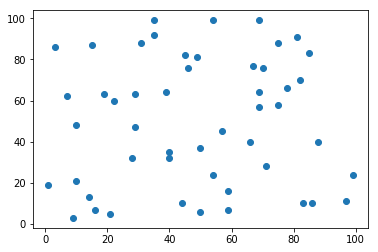

In [3]:
plt.scatter([x[0] for x in points], [x[1] for x in points])

O primeiro passo é encontrar o ponto $P$ com a menor coordenada $y$. Caso haja mais de um ponto com o mesmo $y$, a coordenada $x$ será utilizada para critério de desempate. Como o número de pontos a ser analizado é $n$, a tarefa é realizada em O($n$).

In [4]:
points.sort()
P = min(points, key = lambda tup: tup[1])

P

(9, 3)

Em seguida, os pontos são ordenados em ordem crescente pelo ângulo que fazem (em radianos) com $P$ em relação ao eixo $x$, o que é feito em O($n$ log $n$). Para reduzir o custo computacional, calculamos o produto vetorial para a obtenção do ângulo.

In [5]:
# Criamos um dicionário para associar cada ponto ao seu ângulo com P
angles = dict()

for point in points:
    angles[point] = math.atan2(point[1]-P[1], point[0]-P[0])
    
sorted_points = []
sorted_points = sorted(angles.items(), key = lambda x: x[1])

Vamos definidir a função *clock_wise(stack_top, stack_second, point)*. Ela recebe três pontos $p_0$, $p_1$ e $p_2$, os quais formam os vetores $p_0 p_1$ e $p_0 p_2$. Através de um produto vetorial entre esses dois vetores decidimos se $p_2$ está à esquerda de $p_1$ (produto vetorial negativo), se $p_2$ está à direita de $p_1$ (produto vetorial positivo) ou se os pontos são colineares (produto vetorial = 0).

In [6]:
# Função que retorna < 0 se três pontos estão no sentido anti-horário, > 0 se horário e 0 se são colineares
def clock_wise(p0, p1, p2):
    v1 = p1 - p0
    v2 = p2 - p0
    return v1[0]*v2[1] - v1[1]*v2[0]

In [7]:
def graham_scan(points, sorted_points):
    stack = []

    stack.insert(0, points[0])
    stack.insert(0, points[1])

    for point in [p[0] for p in sorted_points]:
        while len(stack) > 1 and clock_wise(point, np.array(stack[0]), np.array(stack[1])) > 0:
            stack.pop(0)

        stack.insert(0, point)

    return stack

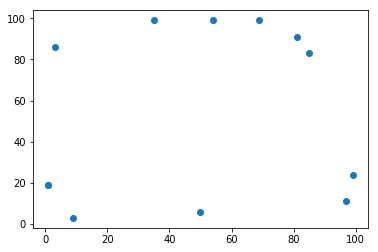

In [8]:
stack = graham_scan(points, sorted_points)

plt.scatter([x[0] for x in stack], [x[1] for x in stack])

### Embrulho para presente

O primeiro passo é escolher o ponto mais à esquerda $P_0$, ou seja, o ponto cujo valor da coordenada $x$ seja o menor possível. Como já previamente ordenamos os pontos pelo valor de $x$, basta escolhermos o primeiro. Em seguida, começamos com $i$ = 0 e escolhemos um ponto $P_{i + 1}$ de forma que todos os pontos estejam à direita de da reta formada por $P_i$ e $P_{i + 1}$. O algoritmo para quando $P_{i + 1}$ = $P_0$.

Definimos a seguir a função *gift_wrapping(points)*, que também retorna uma lista de pontos que configuram a envoltura convexa do conjunto de pontos. O tempo de excução é O($nh$), onde $n$ é o número de pontos ao todo e $h$ é o número de pontos pertencentes à envoltura.

In [9]:
def gift_wrapping(points):
    convex_hull = []
    # Ponto mais à esquerda, que garantidamente pertence à envoltura
    P = points[0]
    
    i = 0
    
    while True:
        convex_hull.append(P)
        end_pt = points[0]
        
        for j in range(1, len(points)):
            if end_pt == P or clock_wise(np.array(convex_hull[i]), np.array(points[j]), end_pt) < 0:
                # Há pontos à esquerda de end_pt, atualizamos o end_pt
                end_pt = points[j]
        
        i += 1
        P = end_pt
        
        # Voltamos ao primeiro ponto
        if end_pt == points[0]:
            break
    
    return convex_hull

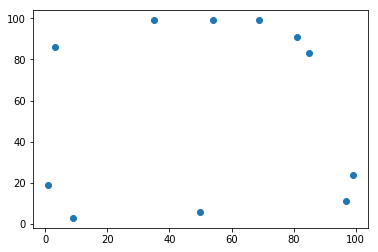

In [10]:
convex_hull = gift_wrapping(points)

plt.scatter([x[0] for x in convex_hull], [x[1] for x in convex_hull])